In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Libraries

In [2]:
import numpy as np              # create transformation matrix
import matplotlib.pyplot as plt # plot the image
from skimage.io import imread   # read/load the input image
from scipy import ndimage       # affine transformation

# **Original Image**

In [3]:
image = imread('/content/drive/MyDrive/Youtube Tutorial/Digital Image Processing/#22 Affine Transformation/Food.jpg', 
               as_gray=True)

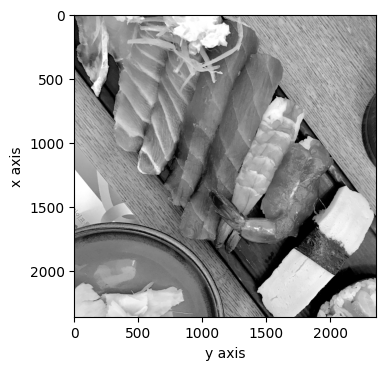

In [4]:
plt.figure(dpi=100)
plt.imshow(image, cmap='gray')
plt.xlabel('y axis')
plt.ylabel('x axis')
plt.show()

The origin of matplotlib `imshow` plot is on the **top left corner**, thus the vertical direction is the x-axis and the horizontal direction is the y-axis.

# Affine Transformation

Affine Transformation Matrix from Wikipedia: https://upload.wikimedia.org/wikipedia/commons/2/2c/2D_affine_transformation_matrix.svg

`ndimage.affine_transform(originalImage, transformationMatrix)`

In [5]:
# displaying the original image and transformed image
def show(image, transformedImage):
    
    fig, ax = plt.subplots(nrows=1, ncols=2, dpi=100)
    
    ax[0].set_title('Original Image')
    ax[0].imshow(image, cmap='gray')
    ax[0].set_xlabel('y axis')
    ax[0].set_ylabel('x axis')

    ax[1].set_title('Transformed Image')
    ax[1].imshow(transformedImage, cmap='gray')
    ax[1].set_xlabel('y axis')
    ax[1].set_ylabel('x axis')
    
    fig.tight_layout()
    
    plt.show()

# **Identity**

$$\begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

In [6]:
matIdentity = np.array([[1,0,0],[0,1,0],[0,0,1]])
matIdentity

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [7]:
imIdentity = ndimage.affine_transform(image, matIdentity)

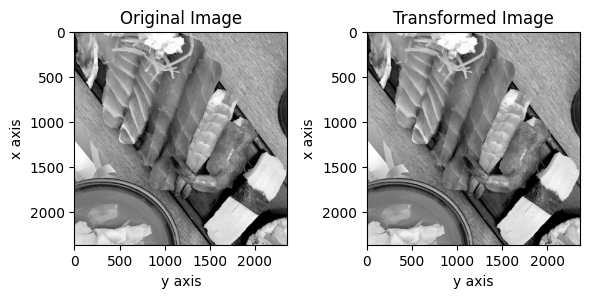

In [8]:
show(image, imIdentity)

# **Translation**

$$\begin{bmatrix} 1 & 0 & X \\ 0 & 1 & Y \\ 0 & 0 & 1 \end{bmatrix}$$

**Translation in x-axis (vertical direction)**

`x=positive` translate/move image upward

`x=negative` translate/move image downward

In [9]:
matTranslation = np.array([[1,0,1000],
                           [0,1,0],
                           [0,0,1]])
matTranslation

array([[   1,    0, 1000],
       [   0,    1,    0],
       [   0,    0,    1]])

In [10]:
imTranslation = ndimage.affine_transform(image, matTranslation)

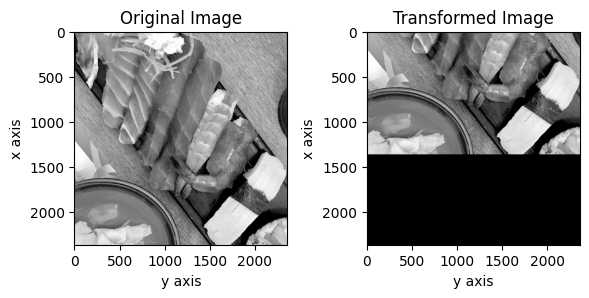

In [11]:
show(image, imTranslation)

**Translation in y-axis (horizontal direction)**

`Y=positive` translate/move image to the left

`Y=negative` translate/move image to the right

In [12]:
matTranslation = np.array([[1,0,0],
                           [0,1,1000],
                           [0,0,1]])
matTranslation

array([[   1,    0,    0],
       [   0,    1, 1000],
       [   0,    0,    1]])

In [13]:
imTranslation = ndimage.affine_transform(image, matTranslation)

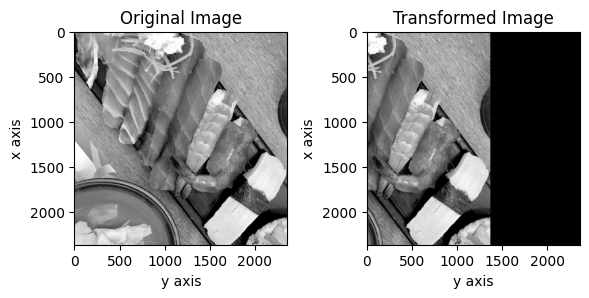

In [14]:
show(image, imTranslation)

**Translation in X-and-Y-axis**

In [15]:
matTranslation = np.array([[1,0,1000],
                           [0,1,1000],
                           [0,0,1]])
matTranslation

array([[   1,    0, 1000],
       [   0,    1, 1000],
       [   0,    0,    1]])

In [16]:
imTranslation = ndimage.affine_transform(image, matTranslation)

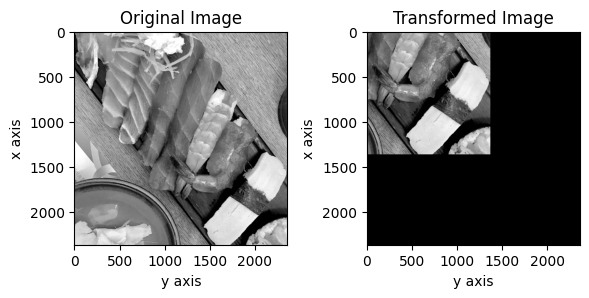

In [17]:
show(image, imTranslation)

# Scale

$$\begin{bmatrix} W & 0 & 0 \\ 0 & H & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

`W` is scale in x-axis

`H` is scale in y-axis

if `W or H < 1`: zoom in the image

if `W or H > 1`: zoom out the image

**Scale in x-axis (vertical direction)**

In [18]:
matScale = np.array([[0.5,0,0],[0,1,0],[0,0,1]])
matScale

array([[0.5, 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ]])

In [19]:
imScale = ndimage.affine_transform(image, matScale)

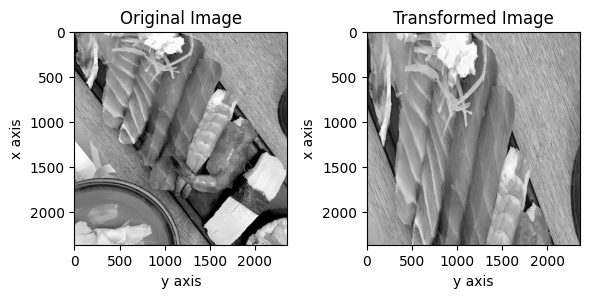

In [20]:
show(image, imScale)

**Scale in y-axis (horizontal)**

In [21]:
matScale = np.array([[1,0,0],[0,0.5,0],[0,0,1]])
matScale

array([[1. , 0. , 0. ],
       [0. , 0.5, 0. ],
       [0. , 0. , 1. ]])

In [22]:
imScale = ndimage.affine_transform(image, matScale)

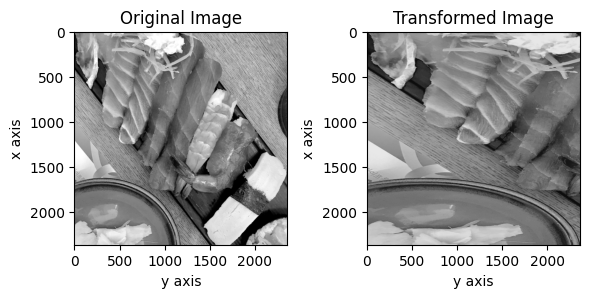

In [23]:
show(image, imScale)

**Scale in both axis**

In [24]:
matScale = np.array([[0.5,0,0],[0,0.5,0],[0,0,1]])
matScale

array([[0.5, 0. , 0. ],
       [0. , 0.5, 0. ],
       [0. , 0. , 1. ]])

In [25]:
imScale = ndimage.affine_transform(image, matScale)

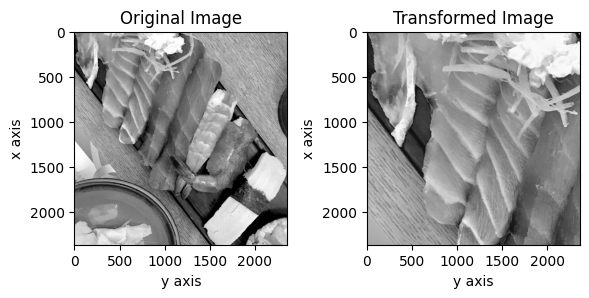

In [26]:
show(image, imScale)

**Scale in the middle of the image**

$$\begin{bmatrix} W & 0 & X \\ 0 & H & Y \\ 0 & 0 & 1 \end{bmatrix}$$

In [27]:
# get image width and height
wImage, hImage = image.shape

# translate the image (move the origin to center)
matTranslationCenter = np.array([[1,0,wImage/2],[0,1,hImage/2],[0,0,1]])

# scale the image
matScale = np.array([[0.5,0,0],[0,0.5,0],[0,0,1]])
#matScale = np.array([[1.5,0,0],[0,1.5,0],[0,0,1]])

# translate the image (move the origin back to top left corner)
matTranslationTopLeft = np.array([[1,0,-wImage/2],[0,1,-hImage/2],[0,0,1]])

# combine the transformation maatrix by matrix multiplication
matScaleMid = matTranslationCenter @ matScale @ matTranslationTopLeft
matScaleMid

array([[5.0000e-01, 0.0000e+00, 5.9025e+02],
       [0.0000e+00, 5.0000e-01, 5.9025e+02],
       [0.0000e+00, 0.0000e+00, 1.0000e+00]])

In [28]:
imScaleMid = ndimage.affine_transform(image, matScaleMid)

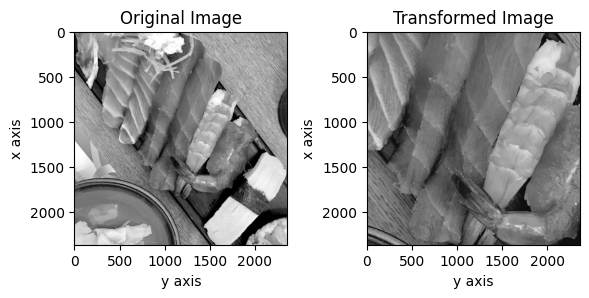

In [29]:
show(image, imScaleMid)

# **Reflection**

**Reflect about x-axis (vertical)**

$$\begin{bmatrix} 1 & 0 & 0 \\ 0 & -1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

In [30]:
matReflection = np.array([[1,0,0],[0,-1,0],[0,0,1]])
matReflection

array([[ 1,  0,  0],
       [ 0, -1,  0],
       [ 0,  0,  1]])

In [31]:
imReflection = ndimage.affine_transform(image, matReflection)

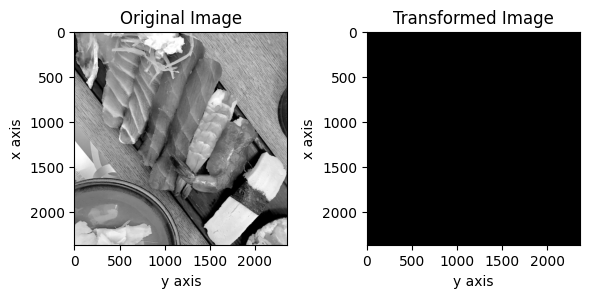

In [32]:
show(image, imReflection)

To do relfection, we should combine the *reflection transformation matrix* with *translation transformation matrix*.

$$\begin{bmatrix} 1 & 0 & 0 \\ 0 & -1 & Y \\ 0 & 0 & 1 \end{bmatrix}$$

In [33]:
# get the image width and height
wImage, hImage = image.shape

# Reflect about x-axis
matReflection  = np.array([[1,0,0],[0,-1,0],[0,0,1]]) 

# Translation in y-axis (horizontal)
matTranslation =  np.array([[1,0,0],[0,1,-wImage],[0,0,1]])

# Matrix multiplication
matRefTrans = matReflection @ matTranslation
matRefTrans

array([[   1,    0,    0],
       [   0,   -1, 2361],
       [   0,    0,    1]])

In [34]:
imReflection = ndimage.affine_transform(image, matRefTrans)

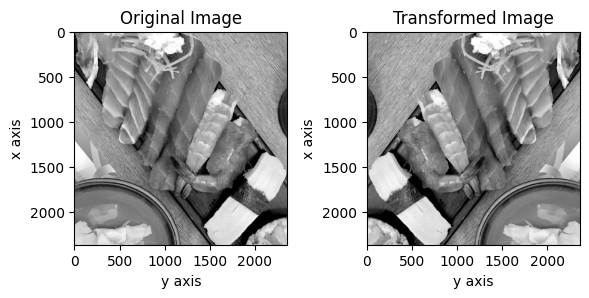

In [35]:
show(image, imReflection)

**Reflection about y-axis (horizontal)**

$$\begin{bmatrix} -1 & 0 & X \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

In [36]:
# Reflect about y-axis 
matReflection  = np.array([[-1,0,0],[0,1,0],[0,0,1]])

# Translate in x-axis (vertical)
matTranslation = np.array([[1,0,-hImage],[0,1,0],[0,0,1]])

# combine the transformation matrix
matRefTrans = matReflection @ matTranslation
matRefTrans

array([[  -1,    0, 2361],
       [   0,    1,    0],
       [   0,    0,    1]])

In [37]:
imReflection = ndimage.affine_transform(image, matRefTrans)

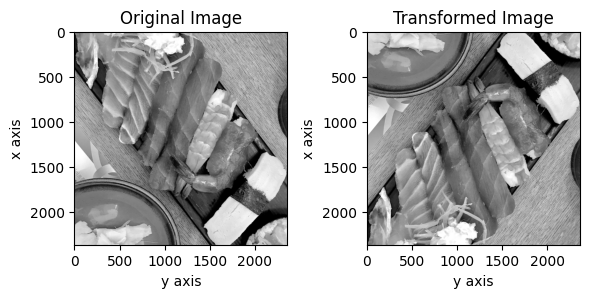

In [38]:
show(image, imReflection)

**Reflection about Origin**


$$\begin{bmatrix} -1 & 0 & X \\ 0 & -1 & Y \\ 0 & 0 & 1 \end{bmatrix}$$

In [39]:
# Reflect about origini
matReflection  = np.array([[-1,0,0],[0,-1,0],[0,0,1]])

# Translate in y-and-x-axis
matTranslation = np.array([[1,0,-hImage],[0,1,-wImage],[0,0,1]])

# combine the transformation matrix
matRefTrans = matReflection @ matTranslation
matRefTrans

array([[  -1,    0, 2361],
       [   0,   -1, 2361],
       [   0,    0,    1]])

In [40]:
imReflection = ndimage.affine_transform(image, matRefTrans)

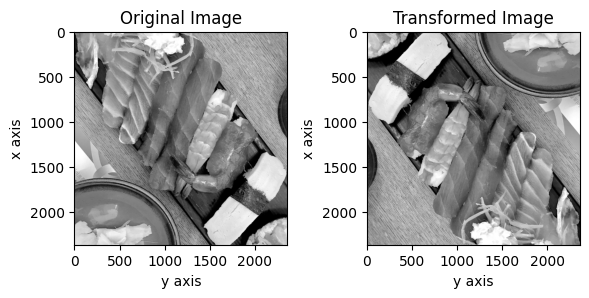

In [41]:
show(image, imReflection)

# **Rotation**

**Clockwise Rotation about Origin**

$$\begin{bmatrix} cos\theta & -sin\theta & 0 \\ sin\theta & cos\theta & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

In [42]:
# Rotation angle
theta = np.pi/6 # 180/6 = 30 degrees

In [43]:
# clockwais rotation about origin
matRotation = np.array([[np.cos(theta),-np.sin(theta),0],
                        [np.sin(theta),np.cos(theta),0],
                        [0,0,1]])
matRotation

array([[ 0.8660254, -0.5      ,  0.       ],
       [ 0.5      ,  0.8660254,  0.       ],
       [ 0.       ,  0.       ,  1.       ]])

In [44]:
imRotation = ndimage.affine_transform(image, matRotation)

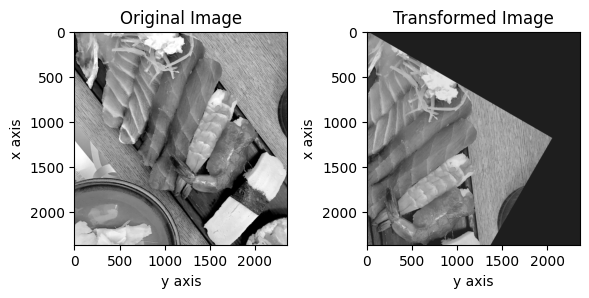

In [45]:
show(image, imRotation)

**Counter-clockwise rotation about origin**

$$\begin{bmatrix} cos\theta & sin\theta & 0 \\ -sin\theta & cos\theta & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

In [46]:
# counter-clockwise
matRotation = np.array([[np.cos(theta),np.sin(theta),0],
                        [-np.sin(theta),np.cos(theta),0],
                        [0,0,1]])
matRotation

array([[ 0.8660254,  0.5      ,  0.       ],
       [-0.5      ,  0.8660254,  0.       ],
       [ 0.       ,  0.       ,  1.       ]])

In [47]:
imRotation = ndimage.affine_transform(image, matRotation)

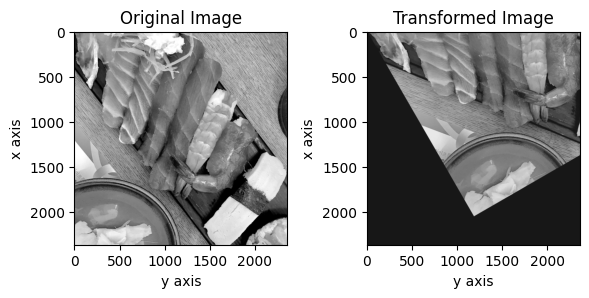

In [48]:
show(image, imRotation)

**Rotation about origin in the center**

$$\begin{bmatrix} cos\theta & -sin\theta & X \\ sin\theta & cos\theta & Y \\ 0 & 0 & 1 \end{bmatrix}$$

In [49]:
# translate the image (move the origin to center)
matTranslation = np.array(np.array([[1,0,wImage/2],[0,1,hImage/2],[0,0,1]]))

# rotation clockwise
matRotation = np.array(np.array([[np.cos(theta),-np.sin(theta),0],[np.sin(theta),np.cos(theta),0],[0,0,1]]))

# translate the image (move back the origin to top left corner)
matTranslationInverse = np.array(np.array([[1,0,-wImage/2],[0,1,-hImage/2],[0,0,1]]))

# combine rotation and translation
matResult = matTranslation @ matRotation @ matTranslationInverse

matResult

array([[ 8.66025404e-01, -5.00000000e-01,  7.48407011e+02],
       [ 5.00000000e-01,  8.66025404e-01, -4.32092989e+02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [50]:
imRotation = ndimage.affine_transform(image, matResult)

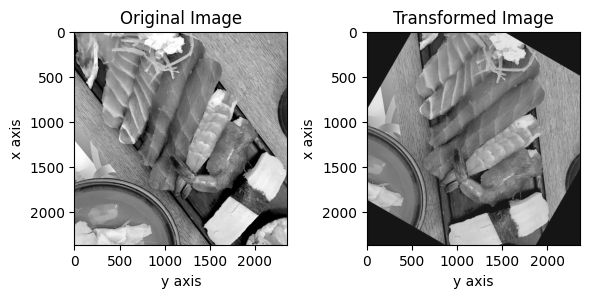

In [51]:
show(image, imRotation)

# Shear

**Shear in y-axis (horizontal direction)**

$$\begin{bmatrix} 1 & 0 & 0 \\ tan\theta & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

In [63]:
matShear = np.array([[1,0,0],[np.tan(theta),1,0],[0,0,1]])
matShear

array([[1.        , 0.        , 0.        ],
       [0.57735027, 1.        , 0.        ],
       [0.        , 0.        , 1.        ]])

In [64]:
imShearX = ndimage.affine_transform(image, matShear)

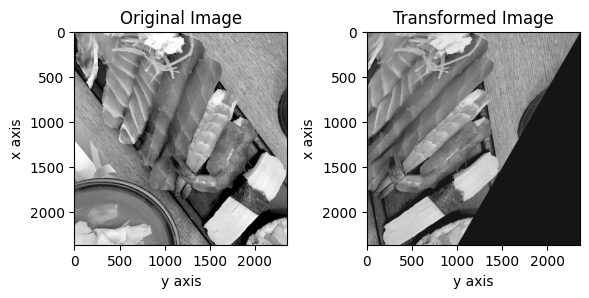

In [65]:
show(image, imShearX)

In [55]:
matShear = np.array([[1,0,0],[-np.tan(theta),1,0],[0,0,1]])
matShear

array([[ 1.        ,  0.        ,  0.        ],
       [-0.57735027,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

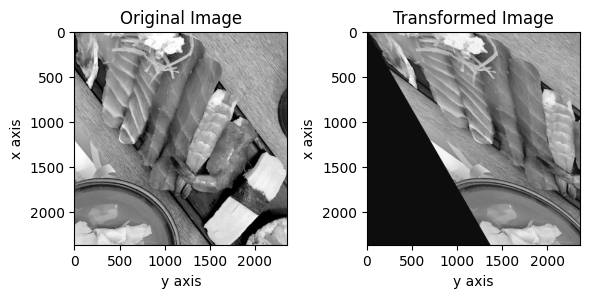

In [56]:
imShearX = ndimage.affine_transform(image, matShear)
show(image, imShearX)

**Shear in x-axis (vertical direction)**

$$\begin{bmatrix} 1 & tan\theta & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

In [57]:
# shear in y axis
matShear = np.array([[1,-np.tan(theta),0],[0,1,0],[0,0,1]])
matShear

array([[ 1.        , -0.57735027,  0.        ],
       [ 0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [58]:
imShearY = ndimage.affine_transform(image, matShear)

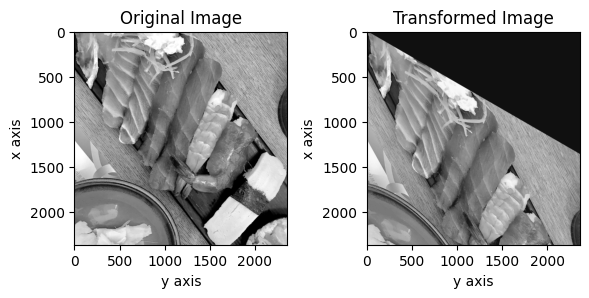

In [59]:
show(image, imShearY)

# THANK YOU